In [1]:
#imports

import os
import numpy as np
from tensorflow.keras import layers, models


In [2]:
# Define the model
model = models.Sequential()

model.add(layers.Conv2D(1, (3, 3), padding='valid', input_shape=(28, 28, 1)))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))  

model.compile(
    optimizer='adam',               
    loss='binary_crossentropy',    
    metrics=['accuracy']           
)

model.summary()

c:\Users\nandi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 676)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           677 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
def save_model_parameters(layer_num, layer):
    save_dir = "InitWeightsConvDense"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    file_path = os.path.join(save_dir, f"layer_number_{layer_num}.npz")
    
    weights = layer.get_weights()  
    if weights:  
        np.savez(file_path, *weights)
        print(f"Saved parameters for layer {layer_num} to {file_path}")
    else:
        print(f"Layer {layer_num} has no weights to save.")

In [4]:
for i, layer in enumerate(model.layers):
    save_model_parameters(i, layer)

Saved parameters for layer 0 to ../../determining denseVsConv/7_ConvLayerImpact/InitWeightsConvDense\layer_number_0.npz
Layer 1 has no weights to save.
Saved parameters for layer 2 to ../../determining denseVsConv/7_ConvLayerImpact/InitWeightsConvDense\layer_number_2.npz


In [5]:
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if weights:
        print(f"Layer {i} weights: {weights}")
    else:
        print(f"Layer {i} has no weights.")

Layer 0 weights: [array([[[[ 0.3893568 ]],

        [[-0.09913531]],

        [[-0.28455317]]],


       [[[ 0.4485693 ]],

        [[ 0.2577802 ]],

        [[ 0.10946494]]],


       [[[ 0.36880797]],

        [[ 0.12543231]],

        [[-0.4188838 ]]]], dtype=float32), array([0.], dtype=float32)]
Layer 1 has no weights.
Layer 2 weights: [array([[-0.02673071],
       [ 0.03266034],
       [-0.0883525 ],
       [ 0.05824327],
       [ 0.06495176],
       [-0.06801197],
       [-0.00305653],
       [ 0.04934549],
       [-0.01289526],
       [ 0.06897619],
       [ 0.04164373],
       [-0.04094676],
       [ 0.06422431],
       [-0.08002929],
       [-0.01600703],
       [ 0.08915318],
       [ 0.01511502],
       [-0.06639402],
       [ 0.07043714],
       [-0.03762823],
       [-0.05266904],
       [ 0.04773215],
       [-0.01970232],
       [ 0.07853661],
       [ 0.0064344 ],
       [ 0.01636314],
       [-0.04493088],
       [-0.09204209],
       [ 0.06686487],
       [ 0.00208286

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot kernel
def plot_kernel(kernel, title):
    plt.figure(figsize=(6, 6))
    # Extract the 2D slice of the kernel weights
    kernel_2d = kernel.reshape(3,3) # Assumes single channel filter
    sns.heatmap(kernel_2d, annot=True, cmap="coolwarm", cbar=True)
    plt.title(title)
    plt.show()

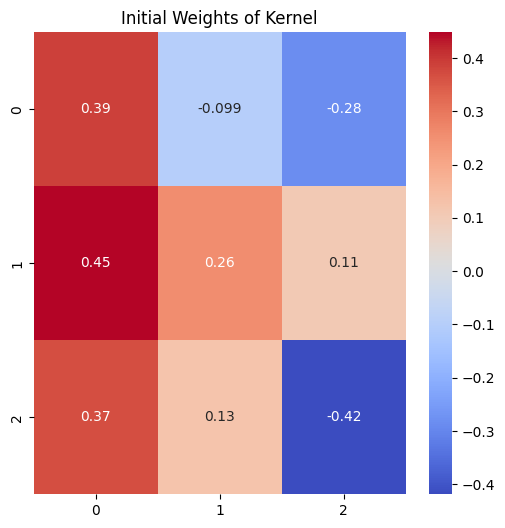

In [7]:
# After training, extract and plot the kernel weights
final_kernel = model.layers[0].get_weights()[0]
plot_kernel(final_kernel, 'Initial Weights of Kernel')